# Ridge Regularization (Solution)
Module 1 | Chapter 1 | Notebook 8

***
After learning about overfitting in the previous lesson, we will look at a remedy for that in this lesson. Regularization. Regularization simplifies multiple linear regression models. You will learn about the first approach, *ridge* regularization, in this lesson.
***


## Ridge Regression


**Scenario:** A Taiwanese investor comes to you to find out how much his properties in Taiwan are actually worth. He might want to resell them. The data for the houses he needs predictions for is located in *Taiwan_real_estate_prediction_data.xlsx*. 

After the overfitting problems in the previous lesson, he is now looking for an optimal solution with as many features as possible, but not more than that. The training data is in *Taiwan_real_estate_training_data.xlsx*.

He wants you to evaluate the model quality with the data in *Taiwan_real_estate_test_data.xlsx*. If it's good, the investor wants to know how much his properties are worth.


In order to make rapid progress, let's import the data and divide it into `df_train` (training data), `df_test` (test data to validate the models) and `df_aim` (prediction data not including property prices).


In [1]:
import pandas as pd
import numpy as np
df_train = pd.read_excel('Taiwan_real_estate_training_data.xlsx', index_col='No')
df_test = pd.read_excel('Taiwan_real_estate_test_data.xlsx', index_col='No')
df_aim = pd.read_excel('Taiwan_real_estate_prediction_data.xlsx', index_col='No')

col_names = ['house_age', 
              'metro_distance', 
              'number_convenience_stores', 
              'number_parking_spaces',
              'air_pollution',
              'light_pollution',
              'noise_pollution',
              'neighborhood_quality',
              'crime_score',
              'energy_consumption',
              'longitude', 
              'price_per_ping']
df_train.columns = col_names
df_test.columns = col_names
df_aim.columns = col_names

df_train.loc[:, 'price_per_m2'] = df_train.loc[:, 'price_per_ping'] / 3.3
df_test.loc[:, 'price_per_m2'] = df_test.loc[:, 'price_per_ping'] / 3.3
df_aim.loc[:, 'price_per_m2'] = df_aim.loc[:, 'price_per_ping'] / 3.3

df_train = df_train.drop('price_per_ping', axis=1)
df_test = df_test.drop('price_per_ping', axis=1)
df_aim = df_aim.drop('price_per_ping', axis=1)

Once again, the data dictionary for this data is as follows:

Column number | Column name       | Type      | Description
 ------------ | ---     | :---------:           | ------------:
0              | `'house_age'` | continuous (`float`) | age of the house in years
1              | `'metro_distance'` | continuous (`float`) | distance in meters to the next metro station
2              | `'number_convenience_stores'` | continuous (`int`) | Number of convenience stores nearby
3              | `'number_parking_spaces'` | continuous (`int`) | Number of parking spaces nearby
4              | `'air_pollution'` | continuous (`float`) | Air pollution value near the house
5              | `'light_pollution'` | continuous (`float`) | Light pollution value near the house
6              | `'noise_pollution'` | continuous (`float`) | Noise pollution value near the house
7              | `'neighborhood_quality'` | continuous (`float`) | average quality of life in the neighborhood
8              | `'crime_score'` | continuous (`float`) | crime score according to police
9              | `'energy_consumption'` | continuous (`float`) | The property's energy consumption
10              | `'longitude'` | continuous (`float`) | The property's longitude
11              | `'price_per_ping'` | continuous (`float`) | House price in Taiwan dollars per ping, one ping is 3.3 m²
12              | `'price_per_ping'` | continuous (`float`) | House price in Taiwan dollars per m²


In the last lesson we saw that too many features in the linear regression model led to overfitting. The trained parameters can then no longer be used to predict new, independent data. The only way to prevent overfitting is to enlarge the training data set and/or simplify the model.

What's known as regularization simplifies the multiple regression model with a data-driven approach. Since the lesson *Simple Linear Regression with sklearn* you know that a linear regression adjusts parameters to the data so that the distance between the regression line and data points is as small as possible. Regularization adds an additional goal. Not only should the distance between the regression line and the data points be as small as possible, but also the slope values.

The formula for multiple linear regression with two features looks like this:

\begin{equation*}
Target = intercept + (slope_1 \cdot Feature_1) + (slope_2 \cdot Feature_2) + error
\end{equation*}

Ridge regression, also known as Tikhonov regularization uses regularization to avoid overfitting. When the model is fitted to the data, there are two objectives that should be pursued:
* Keep the difference between predicted and actual target values as small as possible.
* Keep the sum of the squared slopes (e.g. $(slope_1)^2 + (slope_2)^2$) as small as possible.

The second objective is called regularization, or *shrinkage penalty*. This is as if the model will be punished if the slopes are too big.

It makes sense for you to gain practical experience with ridge regression. Import `Ridge` from the `sklearn.linear_model` module.


In [2]:
# Solution:
from sklearn.linear_model import Ridge

To instantiate the model, we need knowledge about the hyperparameters of the model. The main one is called $\alpha$. This hyper parameter controls how much the ridge regression should follow one target and how much it should follow the other. With `alpha=0` the second objective (regularization) is disregarded. Then the ridge regression would be a normal linear regression.

With an infinitely high `alpha` the first objective disregarded. In this case all slopes are zero.

`alpha` therefore controls the balance between *bias* (very large `alpha`) and *variance* (very small `alpha`). There are data driven ways to get an optimal value for `alpha`. Unfortunately we don't have enough time to cover this here. If you are interested, [the official `sklearn` documentation](https://scikit-learn.org/stable/modules/linear_model.html#setting-regularization-parameter) provides all the information you need.
We have summarized the most important information for you here:
```python
Ridge(
    alpha= float,       #strength of penalty for regularization
    fit_intercept=True, #fit intercept in underlying linear regression
    solver='auto',      #solving algorithm, will affect training runtime
    random_state=None,  #random seed used for data shuffling
)
```

In our case we use an `alpha` value of 1500.


**Deep dive:** The following content is optional, feel free to skip it.<br>

**How does ridge regularization work?**

As we saw in Module 1, Chapter 1, Notebook 6, the *cost function* of the linear regression simply calculates the MSE. Regularizations add what's called a *penalty term* or *regularization term* to this *cost function*. In the case of ridge regularization, this term is nothing more than the L2 norm (see Module 0, Chapter 2 Notebook 4) of the coefficient vector ($\vec{\beta}$) with the exception of the *y_intercept* ($\beta_0$). To make sure you have the ability to adjust the strength of the regularization, the hyperparameter $\alpha$ is used, which the *penalty-term* is multiplied by.

This results in the *cost function* ( $J(\vec{\beta})$ ) of the ridge regression:

$J(\vec{\beta}) = MSE(X,\vec{\beta}) + \alpha \cdot ||\vec{\beta}||_2$

When training the model, the system tries again to minimize this *cost function* and to find optimal values for the coefficients in $\vec{b}$. This solution can be done in several ways, which you can select under the parameter `solver`.


2) Instantiate a linear regression model and store it in the variable `model_ridge`. Set the function parameter `alpha` to `1500`.


In [3]:
# Solution:
model_ridge = Ridge(alpha=1500)

Now we can turn to the feature matrix and the target vector. Save a feature matrix with all eleven features in the new `DataFrame` named `features_train`. Also store the target values from `price_per_m2` in the `Series` named `target_train`.


In [4]:
# Solution:
features_train = df_train.loc[:, col_names[:-1]]
target_train = df_train.loc[:, 'price_per_m2']

Since the ridge regression tries to minimize the squared slopes, the slopes should be on the same scale. Remember that the slopes use their feature's scale. Print the eight value summary for `features_train` to get an impression of the current scales of the different features.


In [5]:
# Solution:
features_train.describe()

,house_age,metro_distance,number_convenience_stores,number_parking_spaces,air_pollution,light_pollution,noise_pollution,neighborhood_quality,crime_score,energy_consumption,longitude
count,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000
mean,17.964968,1080.554101,4.073248,72.544586,552.604234,350.052585,24.454473,0.499967,0.827038,85.749346,121.533587
std,11.302234,1265.305662,2.917018,33.956459,724.980887,214.841852,28.952314,0.129891,0.137589,15.608840,0.015328
min,0.000000,23.382840,0.000000,0.000000,0.129046,109.402514,0.642399,0.154785,0.370455,52.271031,121.475160
25%,10.025000,292.997800,1.000000,47.250000,105.270986,219.736031,6.975039,0.404905,0.750257,73.492326,121.529540
50%,16.250000,492.231300,4.000000,74.000000,273.298306,291.221794,12.933224,0.488622,0.863517,85.537347,121.538990
75%,28.350000,1412.735250,6.000000,91.000000,650.921839,398.473926,29.924671,0.590752,0.936969,98.303667,121.543480
max,43.800000,6396.283000,10.000000,173.000000,4257.231953,1473.563235,162.678976,0.830381,0.999743,119.588789,121.566270


Let's take the scales of `'air_pollution'` and `'noise_pollution'` as an example. While the `'air_pollution'` values vary between 0.1 and 4,300, the `'noise_pollution'` values are only between 0.6 and 163. This does not mean that `'air_pollution'` is any more important than `'noise_pollution'`. Values in one column are not simply directly comparable with values in the other column. 

Nevertheless, ridge regression tries to minimize the slopes that use the scale of its feature. The ridge regression would therefore punish the slope of `'air_pollution'` much less than the increase of `'noise_pollution'`, because `'air_pollution'` has larger values on average and would therefore probably also have a smaller slope value.

How can you tell the ridge regression to treat all features the same? You can use a trick. You standardize the values of each feature. This means that from each value in features ($x$) the mean of its own column ($\bar{x}$) is subtracted and each value is divided by the standard deviation ($\sigma$) of its column. As a formula that looks like this:

<table style="float:left;">
    <tr><th align="left">Word formula</th>
        <th align="left">math. Formula</th>
    </tr>
<tr>
<td>
\begin{equation*}
\operatorname{feature_{standardized}} = \frac{feature - mean_{feature}}{standard deviation_{feature}}
\end{equation*}
    </td>
<td>
\begin{equation*}
\operatorname{feature_{standard}} = \frac{x - \bar{x}}{\sigma}
\end{equation*}  
        </td>
    </tr>
</table>

<br style="clear:both">

`StandardScaler` from `sklearn.preprocessing` implements this kind of standardization. Import `StandardScaler` directly.


In [6]:
# Solution:
from sklearn.preprocessing import StandardScaler

Now we can use `StandardScaler()` to build a scaler. Assign it to `scaler`.


In [7]:
scaler = StandardScaler()

`scaler` calculates means and dispersions using the `my_scaler.fit()` method which it needs to standardize the data. The `my_scaler.transform()` method then standardizes the data with these values. We'll use the `my_scaler.fit_transform()` method here, which carries out both steps. You can ignore the warnings.


In [8]:
features_train_standardized = scaler.fit_transform(features_train)

The warnings are harmless, as they do not affect how your code is executed, but they can become annoying. You can stop the warnings from appearing using the following ode. Try it out now.


In [9]:
#ignore DataConversionWarning
from sklearn.exceptions import DataConversionWarning
import warnings
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

#test results
features_train_standardized = scaler.fit_transform(features_train)

Now the mean values of all columns in `features_train_standardized` should be zero, while the standard deviations (a measure for the dispersion of the data in the row `'std'`) in each column should be 1. We'll tell `pandas` to switch off the scientific notation and convert `features_train_standardized` into a `DataFrame`, and we can then display its eight-value summmary.


In [10]:
pd.options.display.float_format = '{:.2f}'.format  # avoid scientific notation using exponent, display up to two digital places instead
pd.DataFrame(features_train_standardized).describe()  # eight value summary

,0,1,2,3,4,5,6,7,8,9,10
count,314.00,314.00,314.00,314.00,314.00,314.00,314.00,314.00,314.00,314.00,314.00
mean,0.00,-0.00,-0.00,0.00,0.00,0.00,0.00,0.00,-0.00,0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-1.59,-0.84,-1.40,-2.14,-0.76,-1.12,-0.82,-2.66,-3.32,-2.15,-3.82
25%,-0.70,-0.62,-1.06,-0.75,-0.62,-0.61,-0.60,-0.73,-0.56,-0.79,-0.26
50%,-0.15,-0.47,-0.03,0.04,-0.39,-0.27,-0.40,-0.09,0.27,-0.01,0.35
75%,0.92,0.26,0.66,0.54,0.14,0.23,0.19,0.70,0.80,0.81,0.65
max,2.29,4.21,2.04,2.96,5.12,5.24,4.78,2.55,1.26,2.17,2.14


**Attention**: Because of the conversion of the numpy array into a DataFrame, the information about the column names disappeared. When instantiating the `DataFrame` you can add the parameter `columns=features_train.columns` to restore the names. This might help you to interpret the numbers more easily.


In [11]:
#Solution
pd.DataFrame(features_train_standardized, columns=features_train.columns).describe()

,house_age,metro_distance,number_convenience_stores,number_parking_spaces,air_pollution,light_pollution,noise_pollution,neighborhood_quality,crime_score,energy_consumption,longitude
count,314.00,314.00,314.00,314.00,314.00,314.00,314.00,314.00,314.00,314.00,314.00
mean,0.00,-0.00,-0.00,0.00,0.00,0.00,0.00,0.00,-0.00,0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-1.59,-0.84,-1.40,-2.14,-0.76,-1.12,-0.82,-2.66,-3.32,-2.15,-3.82
25%,-0.70,-0.62,-1.06,-0.75,-0.62,-0.61,-0.60,-0.73,-0.56,-0.79,-0.26
50%,-0.15,-0.47,-0.03,0.04,-0.39,-0.27,-0.40,-0.09,0.27,-0.01,0.35
75%,0.92,0.26,0.66,0.54,0.14,0.23,0.19,0.70,0.80,0.81,0.65
max,2.29,4.21,2.04,2.96,5.12,5.24,4.78,2.55,1.26,2.17,2.14


As you predicted earlier, This means that the feature values are now comparable. They now use the same scale. This means that the ridge regression will no longer penalize the slope of one feature more than another.


Now use the `my_model.fit()` method with `model_ridge` together with the standardized feature matrix `features_train_standardized` and `target_train` to fit the ridge regression model to the data.


In [12]:
# Solution:
model_ridge.fit(features_train_standardized, target_train)

Ridge(alpha=1500)

Now visualize the slope values of the ridge regression in a bar chart to find out which are the most important features in the ridge model. Because all slope values are on the same standardized scale, you can compare them directly.


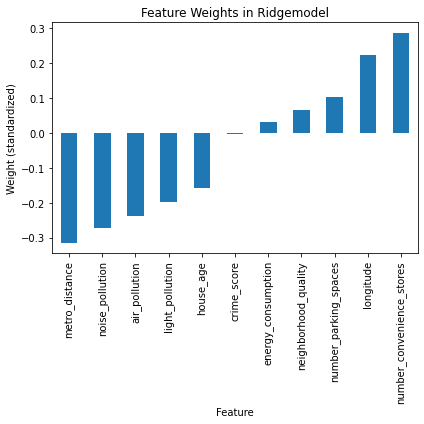

In [13]:
# Solution:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,figsize=(6,6))
pd.Series(model_ridge.coef_, index=features_train.columns).sort_values().plot.bar(ax=ax)
ax.set_title('Feature Weights in Ridgemodel')
ax.set_ylabel('Weight (standardized)')
ax.set_xlabel('Feature')
fig.tight_layout()

Your visualization should now look something like this:

<img src="01_01_08_pic01_featureWeightsPlot_en.png"  align="left">


**Congratulations:** You fitted your first ridge regression model to the data. How good is it actually? Next we will evaluate the model quality using the independent test data.


## Determing the ridge regression model quality


Assessing the model quality requires the prediction of target values. For that we need the feature matrix and the target vector with the data from `df_test`. Save them in `features_test` and `target_test`.


In [14]:
# Solution:
features_test = df_test.loc[:, col_names[:-1]]
target_test = df_test.loc[:, 'price_per_m2']

The feature matrix `features_test` doesn't use a uniform scale yet. In order to use the same scale as above, `scaler` should transform the test data exactly as it did the training data. We therefore have to carry out the `my_scaler.transform()` step with the test data set.


In [15]:
features_test_standardized = scaler.transform(features_test)

**Important:**
The separation of training and test data is an important principle in the data science process.

Remember this: **Only ever fit to the training set!**

Once a *scaler* or other *transformer* has been fitted, you can apply it to all the data sets.


If we now look at the eight-value summary of `features_test_standardized`, it becomes apparent that the features now don't quite exactly have a mean value of zero and a dispersion (standard deviation) of one. This is to do with the fact that the standardization used the mean and dispersion values from the training data set.


In [16]:
pd.DataFrame(features_test_standardized).describe()  # eight value summary

,0,1,2,3,4,5,6,7,8,9,10
count,110.00,110.00,110.00,110.00,110.00,110.00,110.00,110.00,110.00,110.00,110.00
mean,-0.22,-0.04,0.28,0.29,-0.10,-1.47,5.51,0.12,-0.06,-0.07,-0.08
std,1.01,1.02,1.23,2.03,0.89,0.61,2.52,0.96,1.04,1.03,1.03
min,-1.59,-0.85,-1.40,-2.14,-0.76,-1.63,-0.73,-2.06,-2.87,-2.15,-3.92
25%,-1.09,-0.71,-0.71,-0.49,-0.70,-1.63,4.06,-0.54,-0.62,-0.99,-1.04
50%,-0.39,-0.52,0.32,0.09,-0.51,-1.62,5.48,0.12,0.17,0.01,0.32
75%,0.32,0.50,1.00,0.63,0.09,-1.61,7.44,0.79,0.73,0.72,0.62
max,2.19,4.28,5.81,18.68,3.83,3.22,9.45,2.77,1.26,2.18,1.70


Now calculate the predicted house prices of the test data set using the `my_model.predict()` method with `model_ridge`. Note that it should now get the standardized features of the test data set. Store the predicted house prices in the variable `target_test_pred_ridge`.


In [17]:
# Solution:
target_test_pred_ridge = model_ridge.predict(features_test_standardized)

With `target_test` and `target_test_pred_ridge` you now have everything you need to calculate the *mean squared error* , *RMSE* and *R²* model quality metrics. Print these values.


In [18]:
# Solution:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

print('MSE: ', mean_squared_error(target_test, target_test_pred_ridge))
print('RMSE: ', np.sqrt(mean_squared_error(target_test, target_test_pred_ridge)))
print('R2: ', r2_score(target_test, target_test_pred_ridge))

MSE:  10.834407403869
RMSE:  3.2915661020050924
R2:  0.18093724447993753


How good are these values compared to the other regressions we calculated in this chapter?


Looking at the performance of the other models we've worked with so far, we get the following table:

Model| Test: *MSE* | Test: *R²*
---|---|---
`model_age`| 11.89 | 10.1%
`model_metro`| 10.27 | 22.4%
`model_stores`| 11.29 | 14.7%
`model_multiple`| 9.72 | 26.5%
`model_multiple_all`| 31.77 | -140.2%
`model_ridge`| 10.83 | 18.1%


**Congratulations:** You used a ridge regression to use all features in a model without leading to severe overfitting. The quality metrics based on test data are better for the ridge regression with eleven features than for the multiple linear regression with eleven features 

Ridge regressions are popular when people want to avoid overfitting and when features correlate with each other. However, they are not suitable for completely removing unimportant features. To do that, you should then look at lasso regressions. We'll cover this approach for *feature selection* in the next lesson.


**Remember:**
* `Ridge` minimizes the sum of the squared slope values
* `Ridge` is suitable to prevent overfitting and colinearity
* **Only ever fit to the training set!**


**Literature:**
If you would like to delve deeper into the subject matter of this chapter, we recommend the following source(s):
* Géron, Aurélien. 2017. *Hands-On Machine Learning with Scikit-Learn & TensorFlow*. Sebastopol : O'Reilly, 2017. p. 108 pp.

***
Do you have any questions about this exercise? Look in the forum to see if they have already been discussed.
***
Found a mistake? Contact Support at support@stackfuel.com.
***
